Home-made VQE test file

1. VQE with UCCSD ansatz and sto-3g basis set

In [3]:
from pyscf import gto
from qc_practice import VQE
from qc_practice.ansatz import UCCSD

mol = gto.M(atom = 'H 0 0 0; H 0 0 0.75', basis = 'sto-3g')
vqe = VQE(mol)
vqe.ansatz = UCCSD()
vqe.run()

Computing Hamiltonian...... Done
SCF Electronic Energy: -1.821721063498602
SCF Total Energy:      -1.116151448938602

Starting VQE Optimization... 
Iteration: 1
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.821648354883971

Iteration: 2
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.649740156869869

Iteration: 3
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.643302112747755

Iteration: 4
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.306977081970530

Iteration: 5
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.654804405578131

Iteration: 6
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy..

Singlet_0

2. VQE with SpinFlip UCCSD and 4-31g basis set

In [1]:
from pyscf import gto
from qc_practice import VQE
from qc_practice.ansatz import UCCSD, SpinFlipUCCSD

mol = gto.M(atom = 'H 0 0 0; H 0 0 2.30', basis = '4-31g')
vqe = VQE(mol, SpinFlipUCCSD())
vqe.run()


Computing Hamiltonian...... Done
SCF Electronic Energy: -1.108291192963878
SCF Total Energy:      -0.878214144737791

Starting VQE Optimization... 
Iteration: 1
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.112840779059119

Iteration: 2
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.103167028117165

Iteration: 3
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.097630877697849

Iteration: 4
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.069164439592754

Iteration: 5
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy........... Done
Electronic energy: -1.102328909162721

Iteration: 6
Computing uccsd ansatz..... Done
Building quantum circuit... Done
Measuring energy..

Singlet_0

3. SSVQE with SpinFlip UCCSD and sto-3g basis set

In [3]:
from pyscf import gto
from qc_practice import SSVQE
from qc_practice.ansatz import UCCSD, SpinFlipUCCSD

mol = gto.M(atom = 'H 0 0 0; H 0 0 2.30', basis = 'sto3-g')
ssvqe = SSVQE(mol)
ssvqe.weights = [1, 0.1, 0.1, 0.1, 0.01, 0.001]
ssvqe.ansatz = SpinFlipUCCSD()
ssvqe.run()

Computing Hamiltonian...... Done
SCF Electronic Energy: -0.960430369580973
SCF Total Energy:      -0.730353321354887


Starting SSVQE Calculation

Iteration: 1
State_0 Energy: -0.730969330976706
State_1 Energy: -0.655030876031524
State_2 Energy: -0.929045644919205
State_3 Energy: -0.930017571211408
State_4 Energy: -0.654647581155725
State_5 Energy: -0.579496223376828

Iteration: 2
State_0 Energy: -0.727766080943249
State_1 Energy: -0.653114401652532
State_2 Energy: -0.930852606476540
State_3 Energy: -0.931057943017147
State_4 Energy: -0.655386792701908
State_5 Energy: -0.578647499008989

Iteration: 3
State_0 Energy: -0.709349819118771
State_1 Energy: -0.671888718154554
State_2 Energy: -0.931304346865874
State_3 Energy: -0.931783465460622
State_4 Energy: -0.636363697093366
State_5 Energy: -0.597058593434960

Iteration: 4
State_0 Energy: -0.692450303820120
State_1 Energy: -0.697680687170138
State_2 Energy: -0.929401561589589
State_3 Energy: -0.931810843666036
State_4 Energy: -0.614465159

[Singlet_0, Singlet_1, Triplet_2, Triplet_3, Singlet_4, Singlet_5]

3-1. SSVQE with SpinFlip UCCSD and 4-31g basis set

In [1]:
from pyscf import gto
from qc_practice import SSVQE
from qc_practice.ansatz import UCCSD, SpinFlipUCCSD

mol = gto.M(atom = 'H 0 0 0; H 0 0 2.30', basis = '4-31g')
ssvqe_431g = SSVQE(mol)
ssvqe_431g.active_space = [1, 1]
ssvqe_431g.weights = [1, 0.1, 0.1, 0.1, 0.01, 0.001]
ssvqe_431g.ansatz = SpinFlipUCCSD()
ssvqe_431g.run()

Computing Hamiltonian...... Done
SCF Electronic Energy: -0.960430369580973
SCF Total Energy:      -0.730353321354887


Starting SSVQE Calculation

Iteration: 1
[1.e-05 1.e-05 1.e-05 1.e-05 1.e-05]
+ 0.000010 0^ 1 
- 0.000010 1^ 0 
+ 0.000010 2^ 3 
- 0.000010 3^ 2 
+ 0.000010 1^ 3^ 0 2 
- 0.000010 0^ 2^ 1 3 

+ 0.000010 0^ 3^ 1 2 
- 0.000010 1^ 2^ 0 3 

State_0 Energy: -0.729668866219533
+ 0.000010 0^ 1 
- 0.000010 1^ 0 
+ 0.000010 2^ 3 
- 0.000010 3^ 2 
+ 0.000010 1^ 3^ 0 2 
- 0.000010 0^ 2^ 1 3 

+ 0.000010 0^ 3^ 1 2 
- 0.000010 1^ 2^ 0 3 

State_1 Energy: -0.655619507447928
+ 0.000010 0^ 1 
- 0.000010 1^ 0 
+ 0.000010 2^ 3 
- 0.000010 3^ 2 
+ 0.000010 1^ 3^ 0 2 
- 0.000010 0^ 2^ 1 3 

+ 0.000010 0^ 3^ 1 2 
- 0.000010 1^ 2^ 0 3 

State_2 Energy: -0.928265366064901
+ 0.000010 0^ 1 
- 0.000010 1^ 0 
+ 0.000010 2^ 3 
- 0.000010 3^ 2 
+ 0.000010 1^ 3^ 0 2 
- 0.000010 0^ 2^ 1 3 

+ 0.000010 0^ 3^ 1 2 
- 0.000010 1^ 2^ 0 3 

State_3 Energy: -0.930633580833227
+ 0.000010 0^ 1 
- 0.000010 1^ 

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

In [5]:
ssvqe_431g.profile.show()

-0.9397449341155968

4. Total Spin Measurement testing code

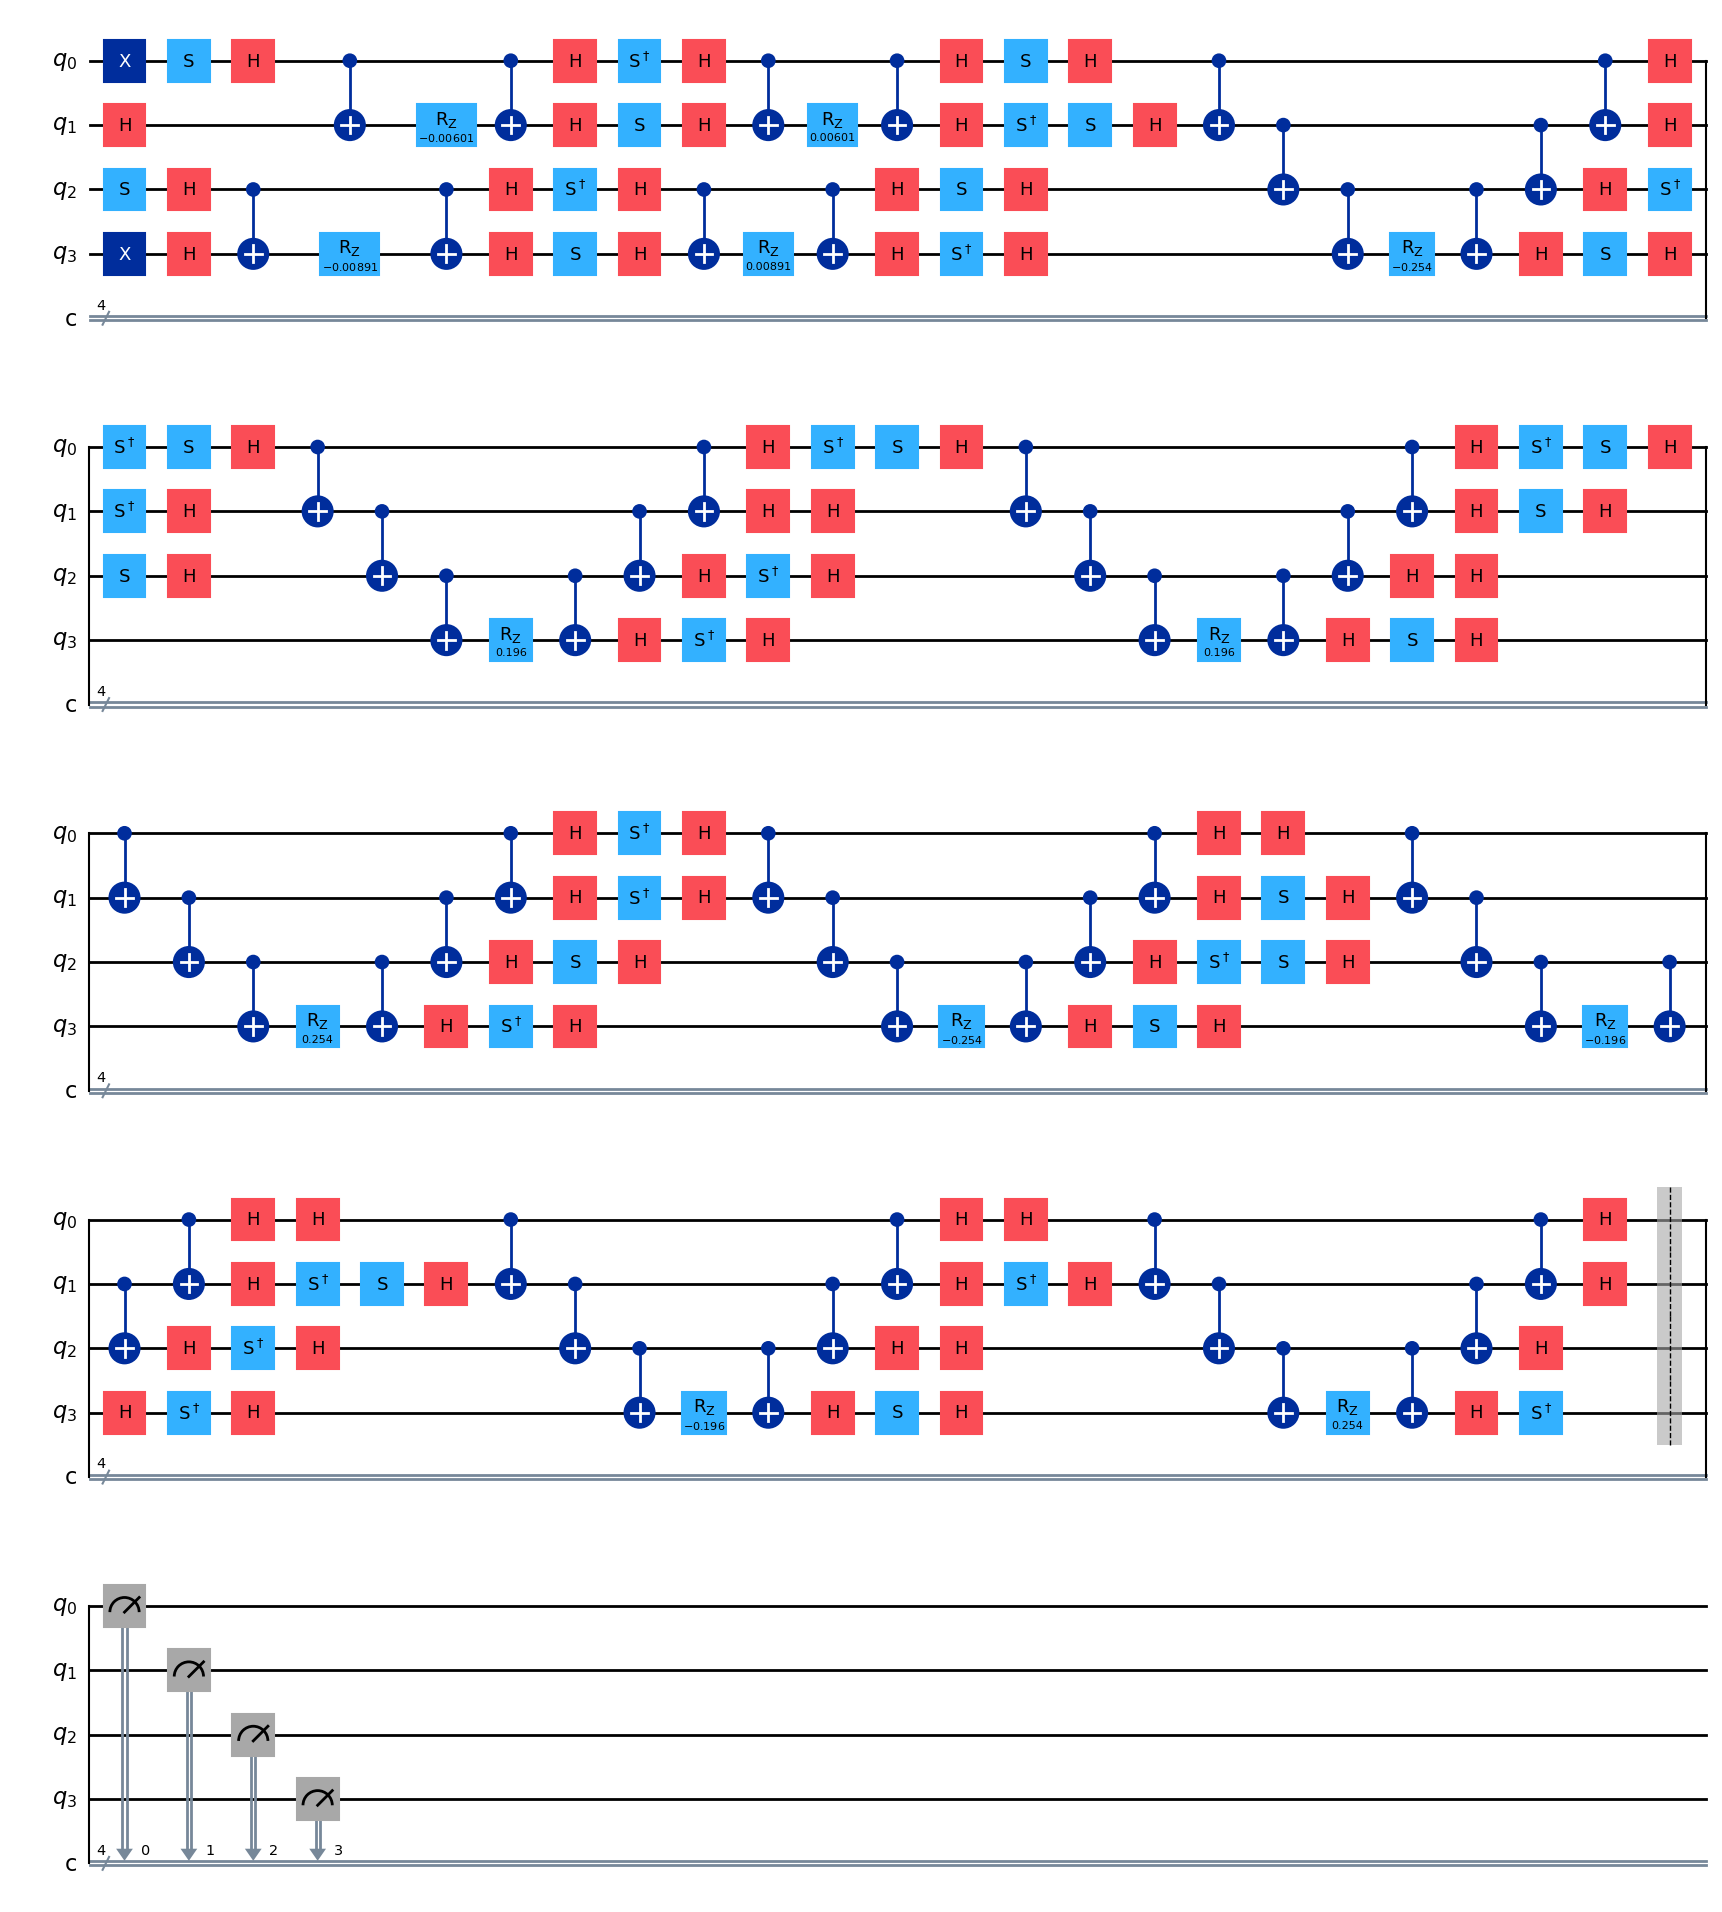

In [2]:
import numpy as np
from pyscf import gto, scf
from qiskit import QuantumCircuit
from qiskit_aer import AerProvider
from qc_practice import SSVQE
from qc_practice.ansatz import SpinFlipUCCSD
from qc_practice.profile import Profile

mol = gto.M(atom = 'H 0 0 0; H 0 0 0.74', basis = 'sto-3g')
rhf = scf.RHF(mol)
profile = Profile()
profile.num_orb = rhf.get_hcore().shape[0]
profile.num_elec = mol.nelectron

ssvqe = SSVQE(mol)
ssvqe.ansatz = SpinFlipUCCSD()
coeff = [0.01201245,  0.01782515, -0.23119888,  1.79793851]
qc = QuantumCircuit(4, 4)
qc.x(0)
qc.x(3)

ssvqe._circuit(qc, SpinFlipUCCSD().ansatz(profile, coeff))
qc.barrier()
for k in range(4):
    qc.measure(k, k)

qc.draw('mpl')
# shots = 100000
# backend = AerProvider().get_backend('qasm_simulator')
# result = backend.run(qc, shots=shots).result().get_counts()
# print(result)

# spin = 0
# for key, value in result.items():
#     for i, orb in enumerate(reversed([*key])):
#         if i < 2:
#             spin += value * int(orb)
#         else:
#             spin -= value * int(orb)

# print(f'multiplicity: {abs(spin/shots/2)}')